following this tutorial: https://medium.com/@santiagocasas/using-python-scientific-tools-for-a-rough-analysis-of-covid-19-data-d3ac58f474bf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters 
##needed to properly use datetime in plots
register_matplotlib_converters()  
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sklm
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

population differences: https://www.google.com/publicdata/explore?ds=kf7tgg1uo9ude_&met_y=population&idim=county:06087:06053&hl=en&dl=en#!ctype=l&strail=false&bcs=d&nselm=h&met_y=population&scale_y=lin&ind_y=false&rdim=country&idim=county:06087:48453:12086&ifdim=country&hl=en_US&dl=en&ind=false

In [43]:
#july 2019 population estimate from https://www.census.gov/quickfacts
miami_dade_population = 2716940
sc_population = 273213
travis_population = 1273954  

# extract data

NYT data: https://github.com/nytimes/covid-19-data

In [2]:
nyt_counties_url= 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'


In [3]:
corona_cases_df=pd.read_csv(nyt_counties_url, index_col=[0] )

In [4]:
fips_sorted_corona_cases_df = corona_cases_df.sort_index()

In [5]:
dade_cases_df = fips_sorted_corona_cases_df[fips_sorted_corona_cases_df['county'] == 'Miami-Dade']
sc_cases_df = fips_sorted_corona_cases_df[fips_sorted_corona_cases_df['fips'] == 6087.0]
travis_cases_df = fips_sorted_corona_cases_df[fips_sorted_corona_cases_df['county'] == 'Travis']

In [48]:
dade_cases_per_capita = dade_cases_df['cases']/miami_dade_population
sc_cases_per_capita = sc_cases_df['cases']/sc_population
travis_cases_per_capita = travis_cases_df['cases']/travis_population

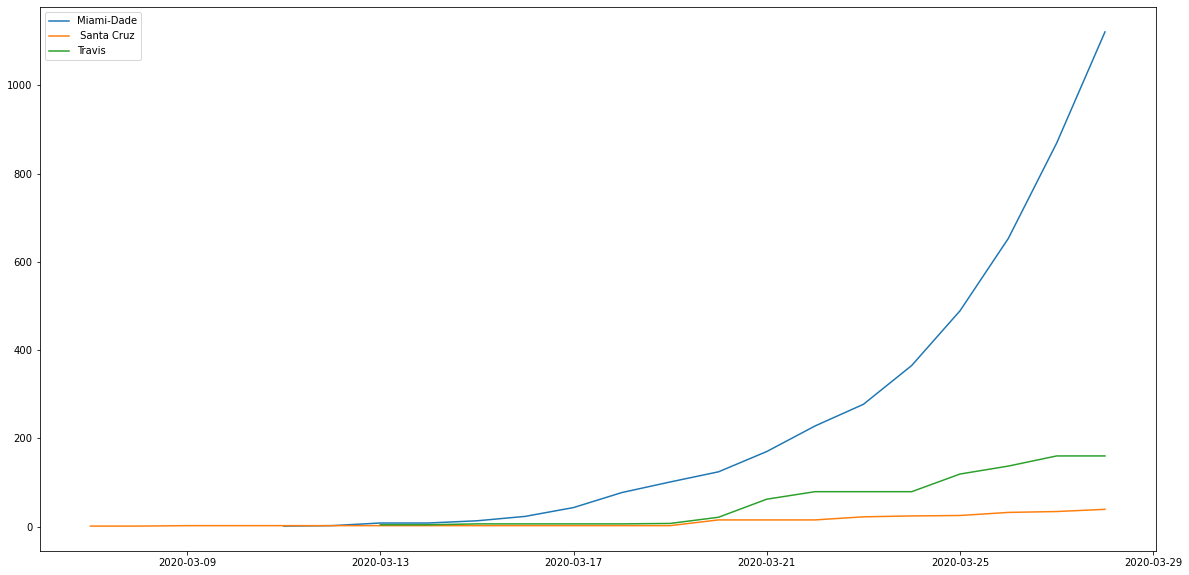

In [47]:
plt.figure(figsize=[20,10])
plt.plot(pd.DatetimeIndex(dade_cases_df.index), dade_cases_df['cases'], label='Miami-Dade')
plt.plot(pd.DatetimeIndex(sc_cases_df.index), sc_cases_df['cases'], label=' Santa Cruz')
plt.plot(pd.DatetimeIndex(travis_cases_df.index), travis_cases_df['cases'], label='Travis')
plt.legend()
# plt.semilogy()
plt.show()

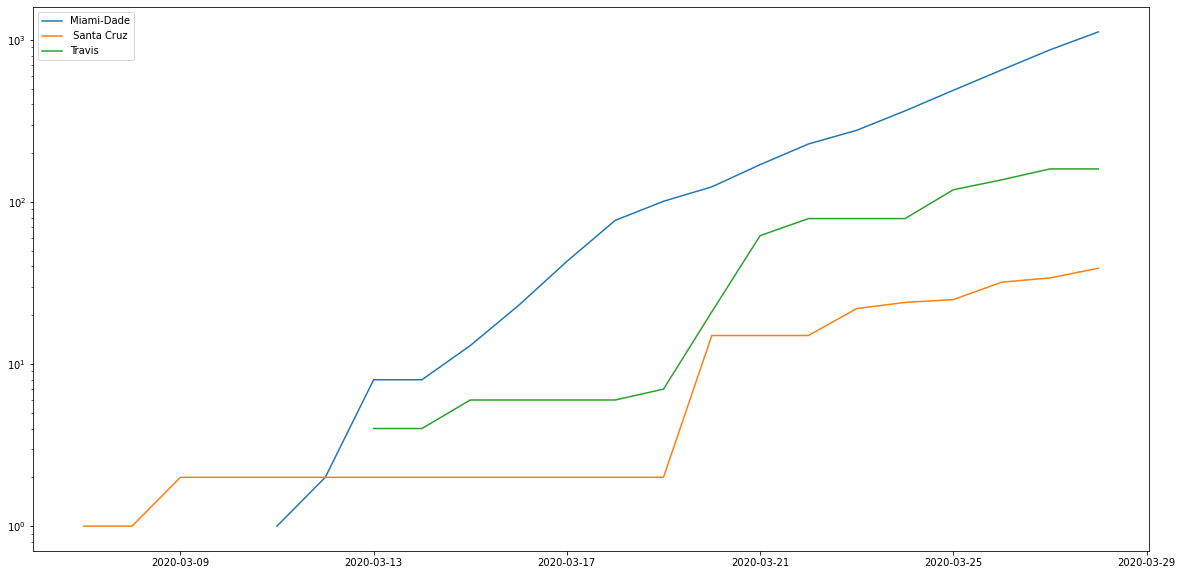

In [6]:
plt.figure(figsize=[20,10])
plt.plot(pd.DatetimeIndex(dade_cases_df.index), dade_cases_df['cases'], label='Miami-Dade')
plt.plot(pd.DatetimeIndex(sc_cases_df.index), sc_cases_df['cases'], label=' Santa Cruz')
plt.plot(pd.DatetimeIndex(travis_cases_df.index), travis_cases_df['cases'], label='Travis')
plt.legend()
plt.semilogy()
plt.show()

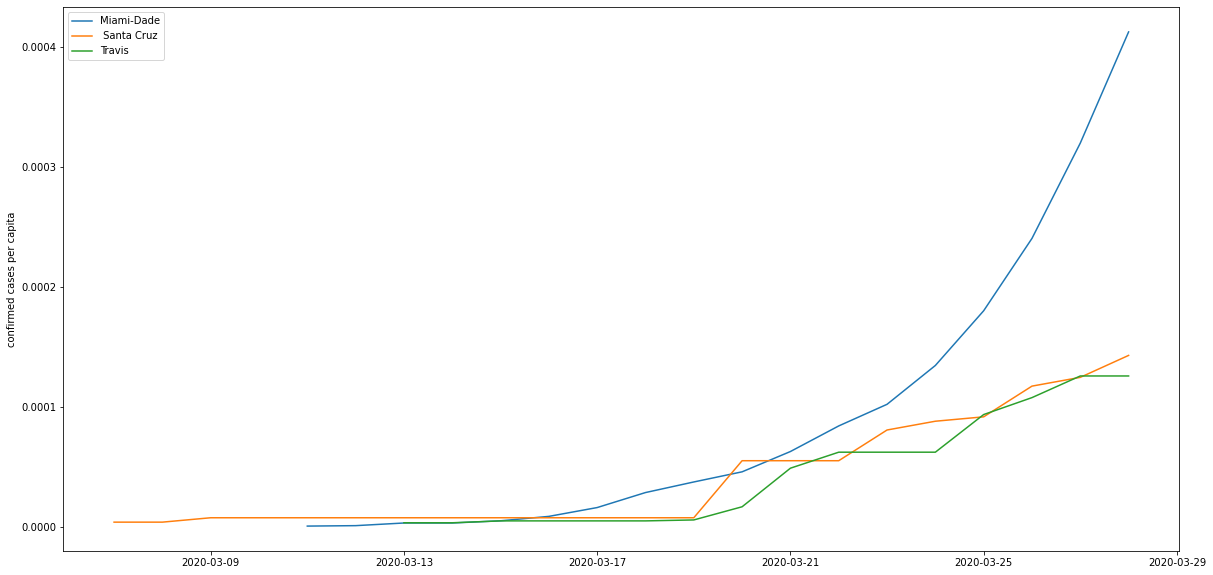

In [49]:
plt.figure(figsize=[20,10])
plt.plot(pd.DatetimeIndex(dade_cases_df.index), dade_cases_per_capita, label='Miami-Dade')
plt.plot(pd.DatetimeIndex(sc_cases_df.index), sc_cases_per_capita, label=' Santa Cruz')
plt.plot(pd.DatetimeIndex(travis_cases_df.index), travis_cases_per_capita, label='Travis')
plt.legend()
# plt.semilogy()

plt.ylabel('confirmed cases per capita')
plt.show()

In [20]:
def get_new_daily_cases(arr_cumulative_cases):
    daily_new_cases = np.diff(arr_cumulative_cases)
    daily_new_cases = np.insert(daily_new_cases,0,arr_cumulative_cases[0])
    return daily_new_cases

In [21]:
dade_daily_new_cases = get_new_daily_cases(dade_cases_df['cases'])
sc_daily_new_cases = get_new_daily_cases(sc_cases_df['cases'])
travis_daily_new_cases = get_new_daily_cases(travis_cases_df['cases'])

In [50]:
dade_daily_new_cases_per_capita = dade_daily_new_cases / miami_dade_population
sc_daily_new_cases_per_capita = sc_daily_new_cases / sc_population
travis_daily_new_cases_per_capita = travis_daily_new_cases / travis_population

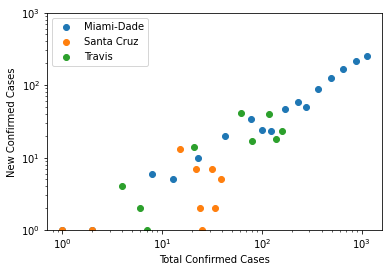

In [42]:
# plt.figure(figsize=[20,10])
plt.scatter(dade_cases_df['cases'], dade_daily_new_cases, label='Miami-Dade')
plt.scatter(sc_cases_df['cases'], sc_daily_new_cases, label='Santa Cruz')
plt.scatter(travis_cases_df['cases'], travis_daily_new_cases, label='Travis')

plt.legend()
plt.loglog()

plt.ylim([1,1000])
plt.xlabel('Total Confirmed Cases')
plt.ylabel('New Confirmed Cases')
plt.show()

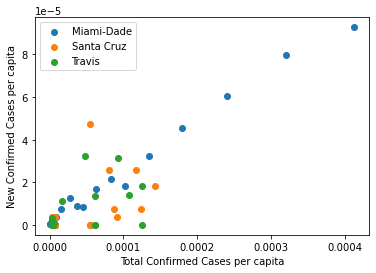

In [56]:
plt.scatter(dade_cases_per_capita, dade_daily_new_cases_per_capita, label='Miami-Dade')
plt.scatter(sc_cases_per_capita, sc_daily_new_cases_per_capita, label='Santa Cruz')
plt.scatter(travis_cases_per_capita, travis_daily_new_cases_per_capita, label='Travis')

plt.legend()
# plt.loglog()

# plt.ylim([1,1000])
plt.xlabel('Total Confirmed Cases per capita')
plt.ylabel('New Confirmed Cases per capita')
plt.show()

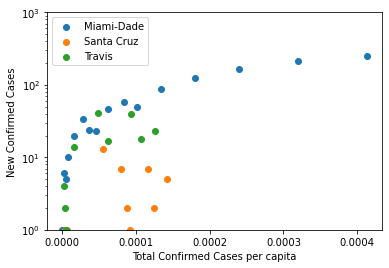

In [60]:
plt.scatter(dade_cases_per_capita, dade_daily_new_cases, label='Miami-Dade')
plt.scatter(sc_cases_per_capita, sc_daily_new_cases, label='Santa Cruz')
plt.scatter(travis_cases_per_capita, travis_daily_new_cases, label='Travis')

plt.legend()
plt.semilogy()

plt.ylim([1,1000])
plt.xlabel('Total Confirmed Cases per capita')
plt.ylabel('New Confirmed Cases')
plt.show()

The John Hopkins observatory is providing a github repository with all recent data: https://github.com/CSSEGISandData/COVID-19.git



In [5]:
giturl_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
giturl_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
giturl_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

In [6]:
casestr='Confirmed'   #'Confirmed' #'Recovered', 'Deaths'
chosen_plotmodel = 'Logistic'  #'Logistc'

In [7]:
if casestr=='Confirmed':
    curl = giturl_confirmed
elif casestr=='Deaths':
    curl = giturl_deaths
elif casestr=='Recovered':
    curl = giturl_recovered

In [8]:
corona_cases_df=pd.read_csv(curl, index_col=[0,1,2,3])  #   use first four columns as multiindex

HTTPError: HTTP Error 404: Not Found

In [8]:
corona_cases_df

1/22/20  1/23/20  1/24/20  \
Province/State Country/Region Lat      Long                                   
NaN            Thailand        15.0000  101.0000        2        3        5   
               Japan           36.0000  138.0000        2        1        2   
               Singapore       1.2833   103.8333        0        1        3   
               Nepal           28.1667  84.2500         0        0        0   
               Malaysia        2.5000   112.5000        0        0        0   
...                                                   ...      ...      ...   
Aruba          Netherlands     12.5186 -70.0358         0        0        0   
NaN            Zambia         -15.4167  28.2833         0        0        0   
               Djibouti        11.8251  42.5903         0        0        0   
               Gambia, The     13.4432 -15.3101         0        0        0   
Montserrat     United Kingdom  16.7425 -62.1874         0        0        0   

                                                  1/25/20  1/26/20  1/27/20  \
Province/State Country/Region Lat      Long                                   
NaN            Thailand        15.0000  101.0000        7        8        8   
               Japan           36.0000  138.0000        2        4        4   
               Singapore       1.2833   103.8333        3        4        5   
               Nepal           28.1667  84.2500         1        1        1   
               Malaysia        2.5000   112.5000        3        4        4   
...                                                   ...      ...      ...   
Aruba          Netherlands     12.5186 -70.0358         0        0        0   
NaN            Zambia         -15.4167  28.2833         0        0        0   
               Djibouti        11.8251  42.5903         0        0        0   
               Gambia, The     13.4432 -15.3101         0        0        0   
Montserrat     United Kingdom  16.7425 -62.1874         0        0        0   

                                                  1/28/20  1/29/20  1/30/20  \
Province/State Country/Region Lat      Long                                   
NaN            Thailand        15.0000  101.0000       14       14       14   
               Japan           36.0000  138.0000        7        7       11   
               Singapore       1.2833   103.8333        7        7       10   
               Nepal           28.1667  84.2500         1        1        1   
               Malaysia        2.5000   112.5000        4        7        8   
...                                                   ...      ...      ...   
Aruba          Netherlands     12.5186 -70.0358         0        0        0   
NaN            Zambia         -15.4167  28.2833         0        0        0   
               Djibouti        11.8251  42.5903         0        0        0   
               Gambia, The     13.4432 -15.3101         0        0        0   
Montserrat     United Kingdom  16.7425 -62.1874         0        0        0   

                                                  1/31/20  ...  3/9/20  \
Province/State Country/Region Lat      Long                ...           
NaN            Thailand        15.0000  101.0000       19  ...      50   
               Japan           36.0000  138.0000       15  ...     511   
               Singapore       1.2833   103.8333       13  ...     150   
               Nepal           28.1667  84.2500         1  ...       1   
               Malaysia        2.5000   112.5000        8  ...     117   
...                                                   ...  ...     ...   
Aruba          Netherlands     12.5186 -70.0358         0  ...       0   
NaN            Zambia         -15.4167  28.2833         0  ...       0   
               Djibouti        11.8251  42.5903         0  ...       0   
               Gambia, The     13.4432 -15.3101         0  ...       0   
Montserrat     United Kingdom  16.7425 -62.1874         0  ...       0   

   

## convert dates to DatetimeIndex

In [7]:
corona_cases_df.columns.values

array(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20',
       '3/16/20', '3/17/20', '3/18/20'], dtype=object)

In [9]:
datesformatted = [datetime.strptime(da, '%m/%d/%y') 
                  for da in corona_cases_df.columns.values]

daterange = pd.DatetimeIndex(datesformatted)

In [10]:
daterange

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      